<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_009_softmax%2C%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8%EB%A1%9C_%EB%8B%A4%EC%A4%91_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/softmax-%ec%9d%b4%ec%a7%84-%eb%b6%84%eb%a5%98-%eb%aa%a8%eb%8d%b8%eb%a1%9c-%eb%8b%a4%ec%a4%91-%eb%b6%84%eb%a5%98-%eb%aa%a8%eb%8d%b8-%eb%a7%8c%eb%93%a4%ea%b8%b0-%eb%a8%b8%ec%8b%a0%eb%9f%ac/)

In [1]:
from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.linear_model import LinearRegression #선형 회귀
from sklearn.datasets import load_iris #붓꽃 데이터 로드

from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.metrics import accuracy_score #적합도(분류)
from sklearn.model_selection import cross_val_score #교차 검증 점수

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

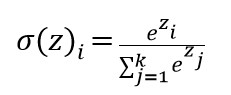

In [10]:
def softmax(y):
  for i,e in enumerate(y):
    es = np.sum(e)
    e = e/es
    y[i]=e

In [12]:
y = [[0.01, 0.93, 0.18],
     [0.01, 0.92, 0.02],
     [0.01, 0.93, 0.14],
     [0.01, 0.14, 0.91],
     [0.92, 0.09, 0.12],
     [0.93, 0.03, 0.01],
     [0.89, 0.10, 0.05],
     [0.01, 0.91, 0.11],
     [0.04, 0.07, 0.92]]
softmax(y)
print(np.round(y,2))

[[0.01 0.83 0.16]
 [0.01 0.97 0.02]
 [0.01 0.86 0.13]
 [0.01 0.13 0.86]
 [0.81 0.08 0.11]
 [0.96 0.03 0.01]
 [0.86 0.1  0.05]
 [0.01 0.88 0.11]
 [0.04 0.07 0.89]]


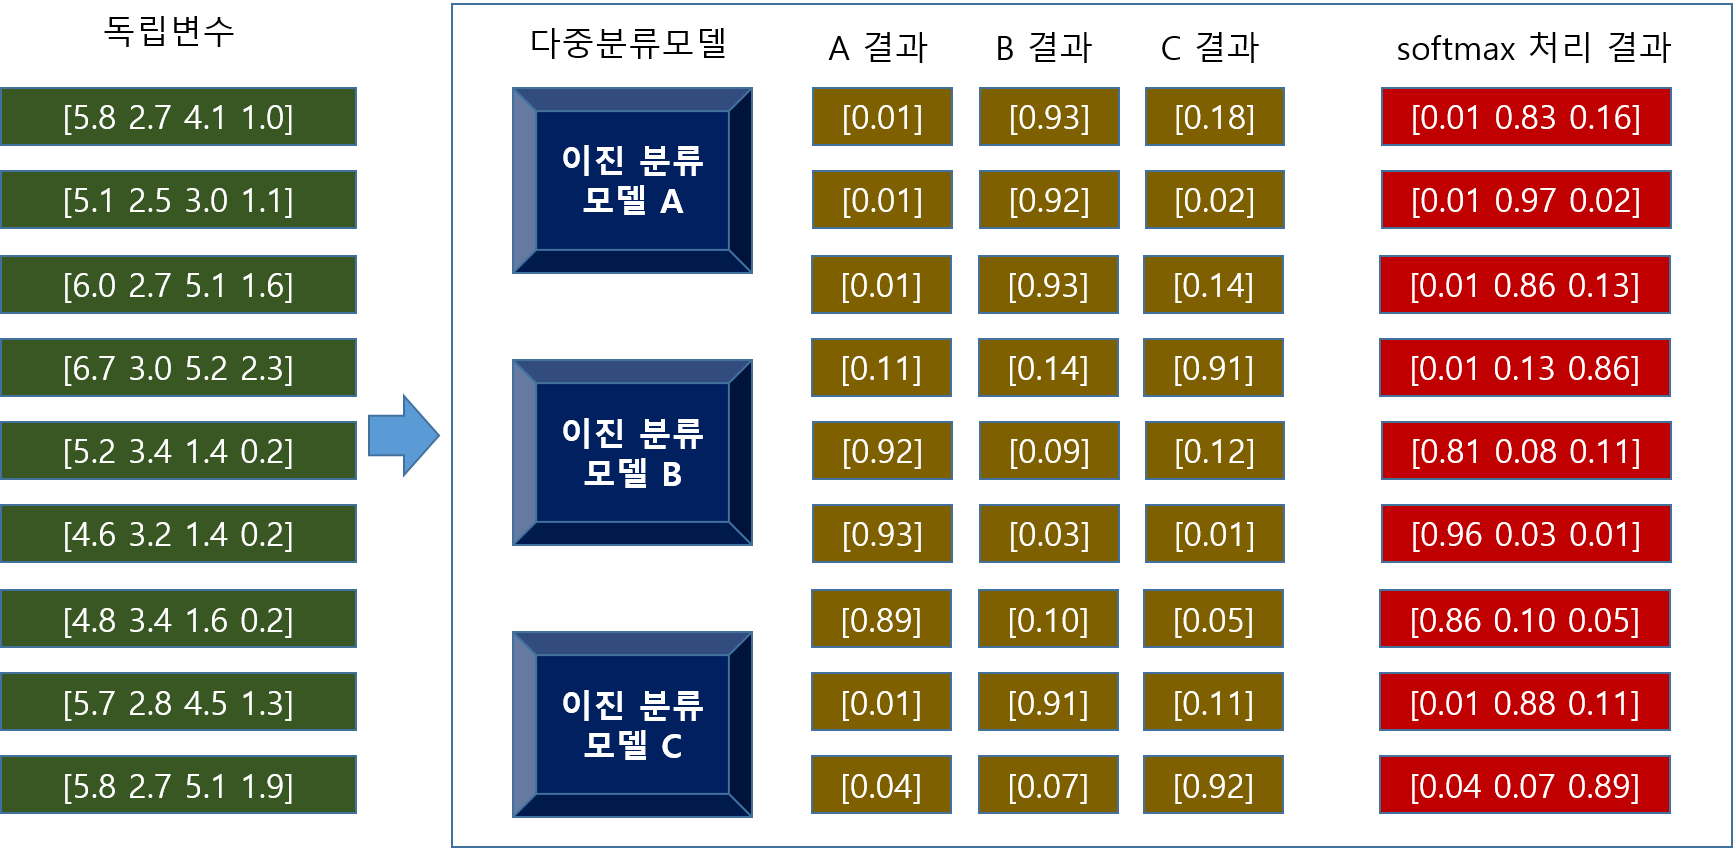

## 다중 분류기 만들기

In [ ]:
class BinaryClassifier:
  def __init__(self):
    self.model = LinearRegression()
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  def fit(self,x,y):
    y = np.array(y)
    y = (y*20)-10 #0은 -10, 1은 10으로 변환
    self.model.fit(x,y)
  def predict(self,x):
    re = self.model.predict(x)
    return (self.sigmoid(re)>=0.5).astype(int)
  def predict_proba(self,x):
    re1 = self.sigmoid(self.model.predict(x))
    re2 = 1- re1
    return np.stack([re2,re1],axis=1)

In [ ]:
class Classifier1:
  def __init__(self):
    self.models = []
  def fit(self,x,y):
    self.models.clear()
    unique_y = np.unique(y)
    ul = len(unique_y)
    self.models = [BinaryClassifier() for _ in range(ul)]
    for i in range(ul):
      model = self.models[i]
      temp_y = (y==i).astype(int) #i번 이면 1, 아니면 0으로 y값을 변환
      temp_y = (temp_y*20)-10 #0은 -10, 1은 10으로 변환
      model.fit(x,temp_y)
  def softmax(self,y):
    for i,e in enumerate(y):
      es = np.sum(e)
      e = e/es
      y[i]=e
  def predict(self,x):
    yp = self.predict_proba(x)
    return np.array([np.argmax(ype) for ype in yp])

  def predict_proba(self,x):
    ml = len(self.models)
    res = []
    for i in range(ml):
      model = self.models[i]
      res.append(model.predict_proba(x)[:,1])
    yp = np.stack([re for re in res],axis=1)
    self.softmax(yp)
    return yp


In [ ]:
class Classifier2:
  def __init__(self):
    self.models = []
  def fit(self,x,y):
    self.models.clear()
    unique_y = np.unique(y)
    ul = len(unique_y)
    self.models = [LogisticRegression() for _ in range(ul)]
    for i in range(ul):
      model = self.models[i]
      temp_y = (y==i).astype(int) #i번 이면 1, 아니면 0으로 y값을 변환
      model.fit(x,temp_y)
  def softmax(self,y):
    for i,e in enumerate(y):
      es = np.sum(e)
      e = e/es
      y[i]=e
  def predict(self,x):
    yp = self.predict_proba(x)
    return np.array([np.argmax(ype) for ype in yp])

  def predict_proba(self,x):
    ml = len(self.models)
    res = []
    for i in range(ml):
      model = self.models[i]
      res.append(model.predict_proba(x)[:,1])
    yp = np.stack([re for re in res],axis=1)
    self.softmax(yp)
    return yp

In [2]:
iris = load_iris()
data = iris.data
target = iris.target

In [7]:
x_train,x_test, y_train,y_test = train_test_split(data,target)

In [ ]:
model = Classifier1()
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
print("테스트 데이터 적합도:",accuracy_score(y_test,pred_test))

학습 데이터 적합도: 0.8303571428571429
테스트 데이터 적합도: 0.8947368421052632


In [ ]:
model = Classifier2()
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
print("테스트 데이터 적합도:",accuracy_score(y_test,pred_test))

학습 데이터 적합도: 0.9375
테스트 데이터 적합도: 0.9736842105263158


In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
print("테스트 데이터 적합도:",accuracy_score(y_test,pred_test))

학습 데이터 적합도: 0.9732142857142857
테스트 데이터 적합도: 0.9736842105263158
